# White elephant

In [ ]:
# Load dataset via lib's functionality

# from spellkit import load_dataset
# dataset = load_dataset("<dataset_name>", split="train", format="csv")

1. [Plotting](#Plotting)
    1. [matplotlib](#matplotlib)
    2. [seaborn](#seaborn)
2. [Data visualization](#Data-visualization)
3. [Big Data](#Big-Data)
    1. [Origins](#Origins)
    2. [Hadoop](#Hadoop)
    3. [YARN](#YARN)
    4. [ZooKeeper](#ZooKeeper)
    5. [Spark](#Spark)
    6. [Kafka](#Kafka)

## Plotting

* matplotlib
* Seaborn
* ggplot


#### matplotlib

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('classic')

%matplotlib inline

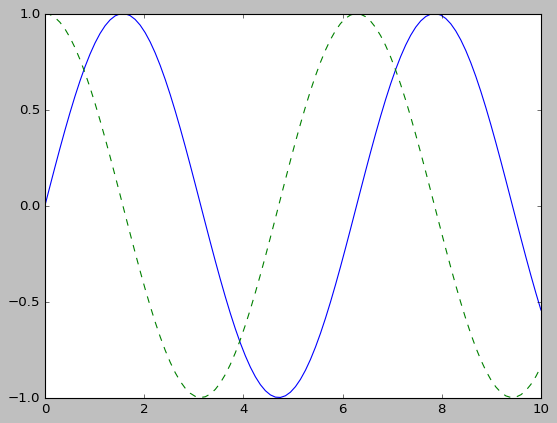

In [4]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [5]:
fig.savefig('trig.png')

In [ ]:
!ls -lh trig.png

-rw-r--r-- 1 root root 39K Sep  9 18:28 trig.png


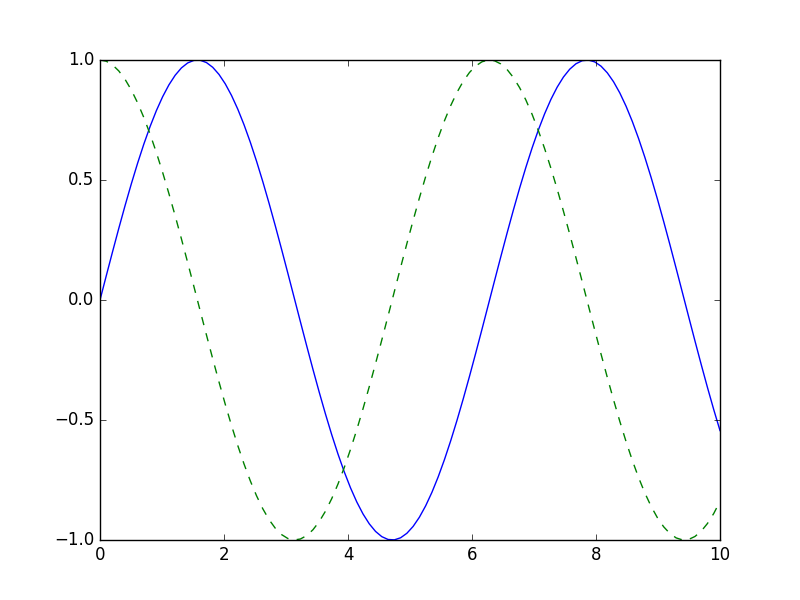

In [6]:
from IPython.display import Image
Image('trig.png')

In [7]:
# different backends
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

__Interfaces__

MATLAB

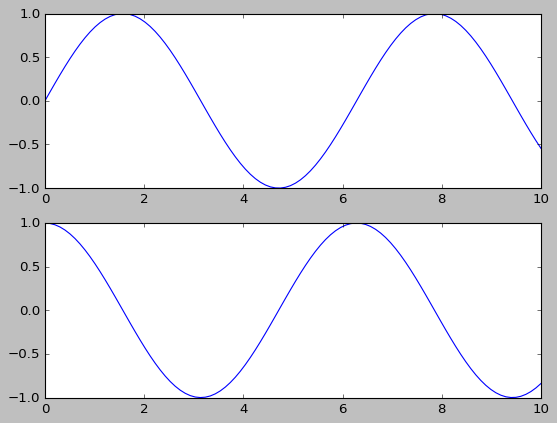

In [11]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Object oriented

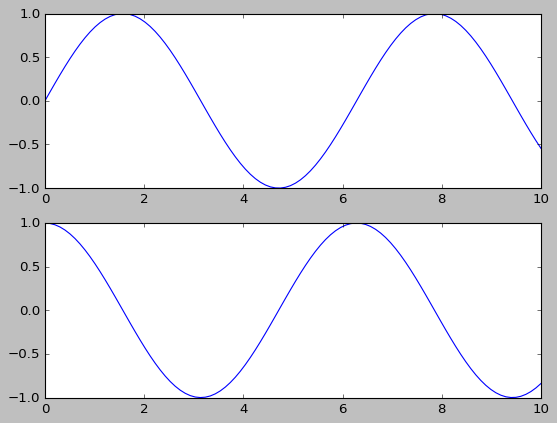

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. In most cases, the difference is as small as switching plt.plot() to ax.plot()

__Line plots__

In [ ]:
plt.style.use('seaborn-whitegrid')

<ipython-input-35-adcf1482bdd0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In Matplotlib, the *figure* (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.

The *axes* (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization

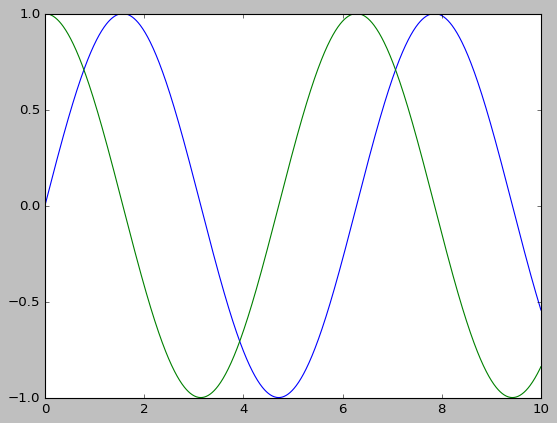

In [12]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

__Plot options__

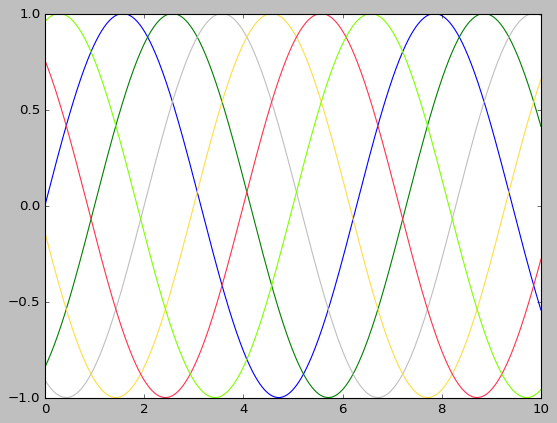

In [15]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

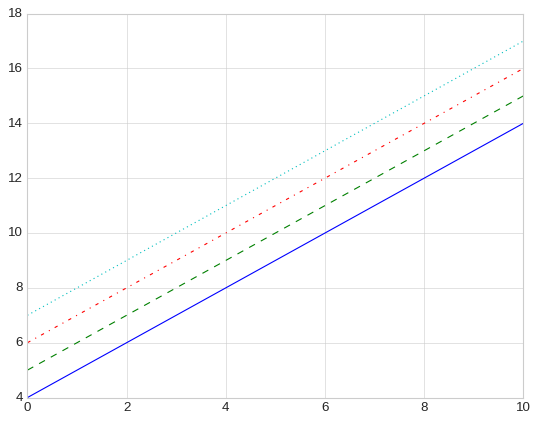

In [ ]:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

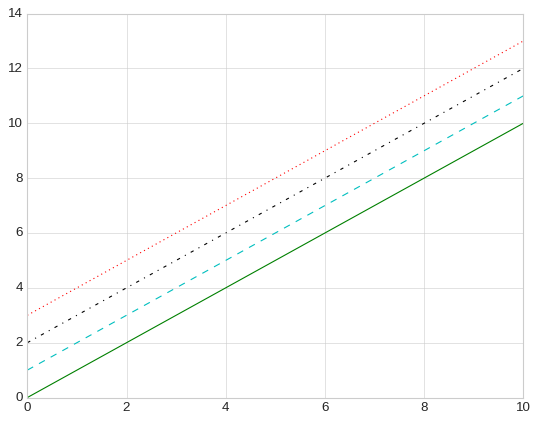

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

__Limits__

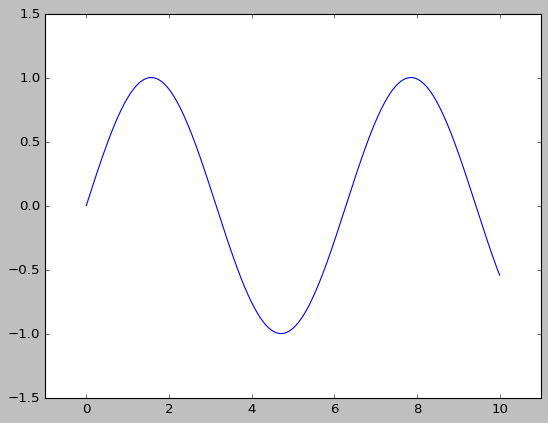

In [17]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);
# or plt.axis([-1, 11, -1.5, 1.5]);

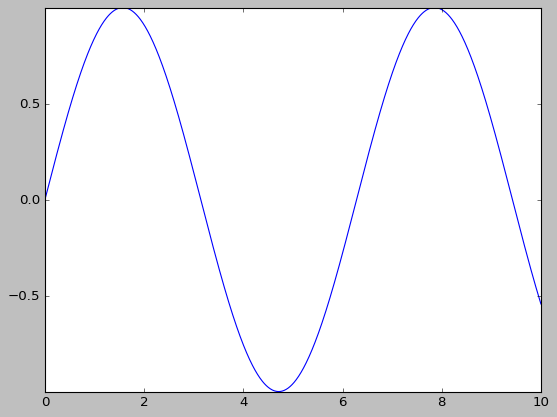

In [22]:
plt.plot(x, np.sin(x))
plt.axis('tight');

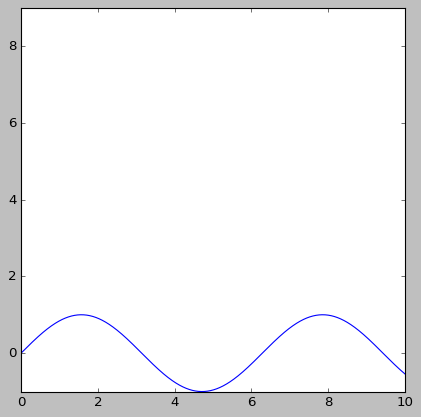

In [23]:
plt.plot(x, np.sin(x))
plt.axis('square');

__Labels__

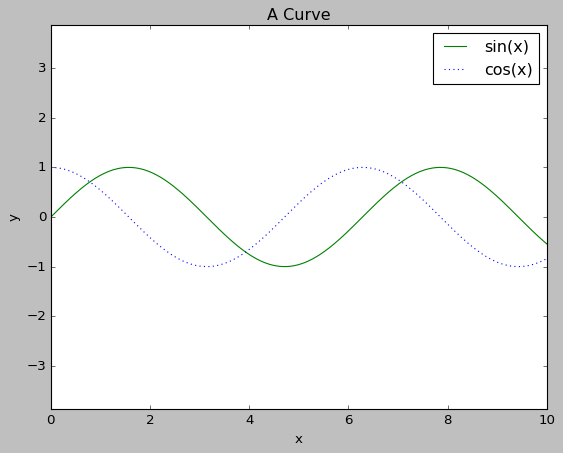

In [24]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.title("A Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

While most `plt` functions translate directly to ax methods (such as `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this is not the case for all commands

* plt.xlabel() → ax.set_xlabel()
* plt.ylabel() → ax.set_ylabel()
* plt.xlim() → ax.set_xlim()
* plt.ylim() → ax.set_ylim()
* plt.title() → ax.set_title()

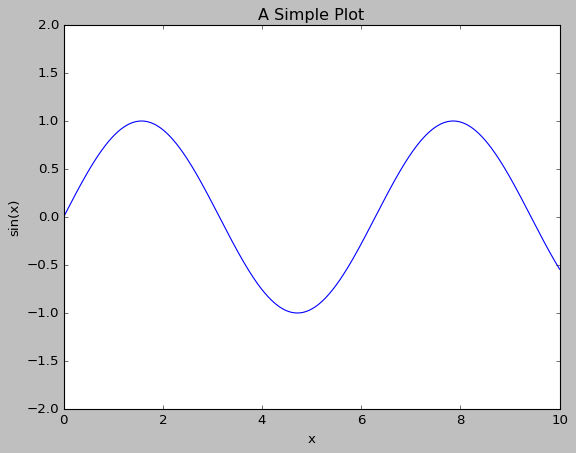

In [27]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

__Scatter plots__

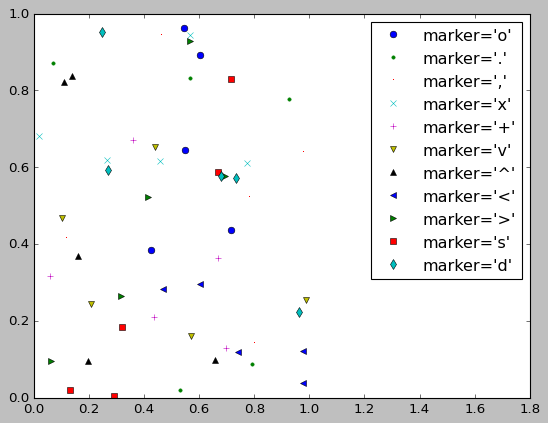

In [28]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='%s'" % marker)
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

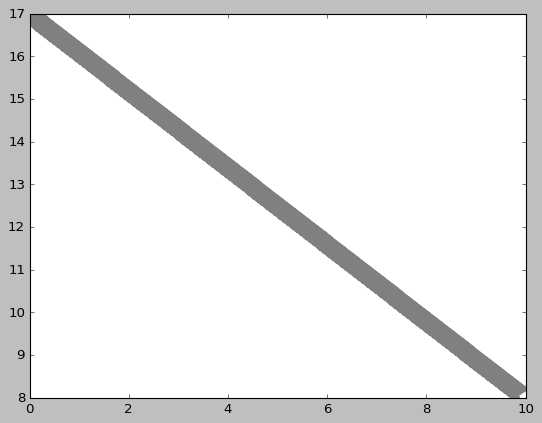

In [39]:
y = np.linspace(17, 8, 1000)

plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
# plt.ylim(-1.2, 1.2);

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

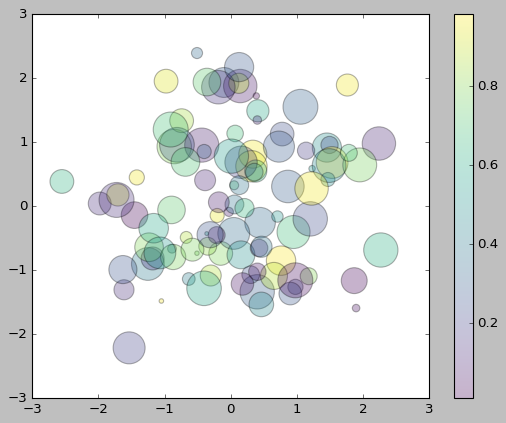

In [40]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

As datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`. The reason is that `plt.scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plt.plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plt.plot` should be preferred over plt.scatter for large datasets.

__Errors and confidence__

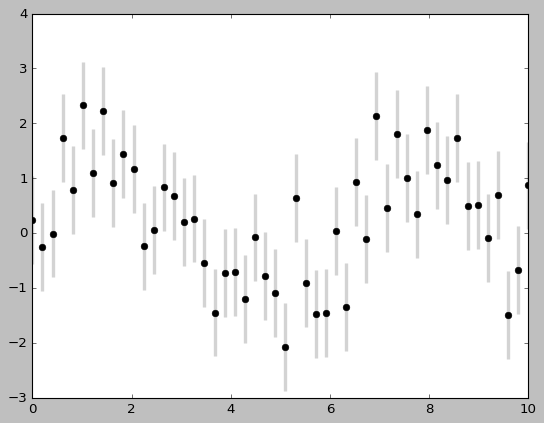

In [45]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

__Contour Plots__

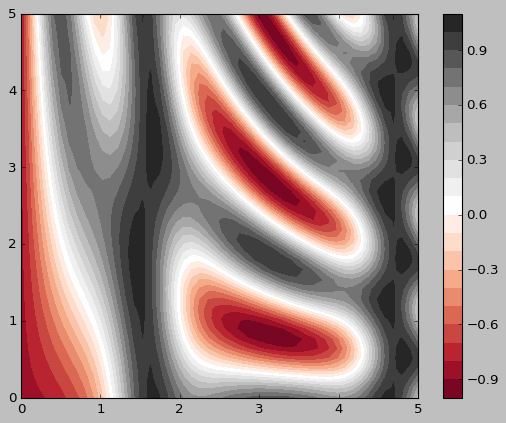

In [59]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

__Histograms__

<ipython-input-60-c302f7739f01>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


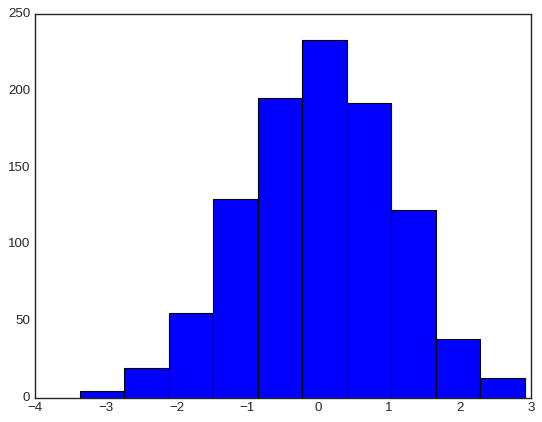

In [60]:
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(data);

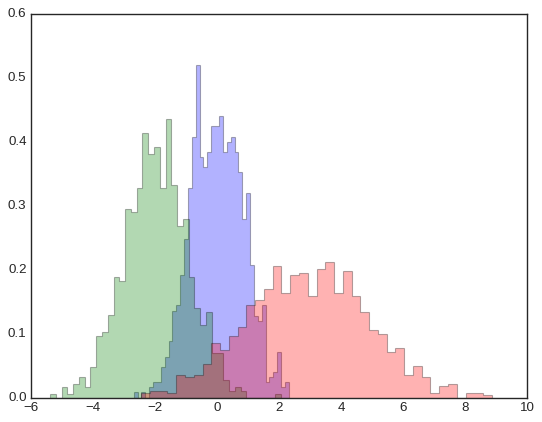

In [84]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)


kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40, density=True)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

__Subplots__

Create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

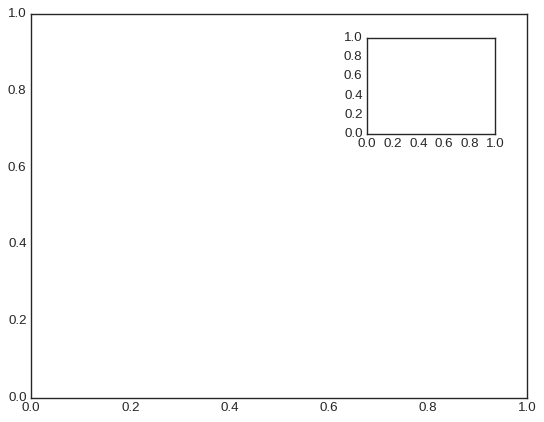

In [85]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

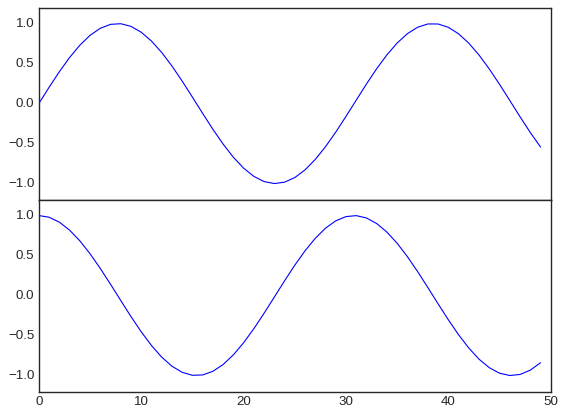

In [86]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

`subplot` command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right

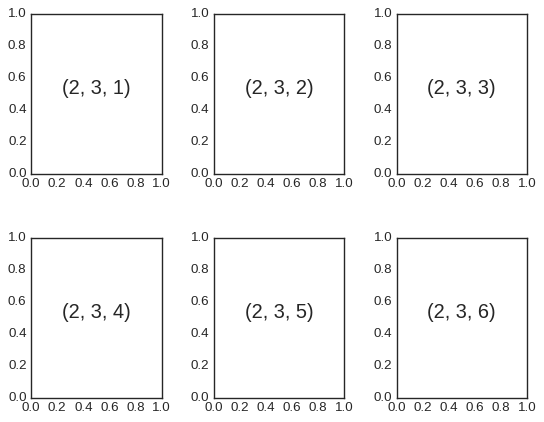

In [87]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale

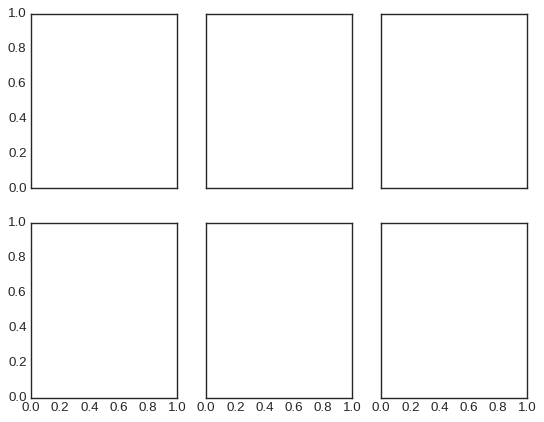

In [88]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

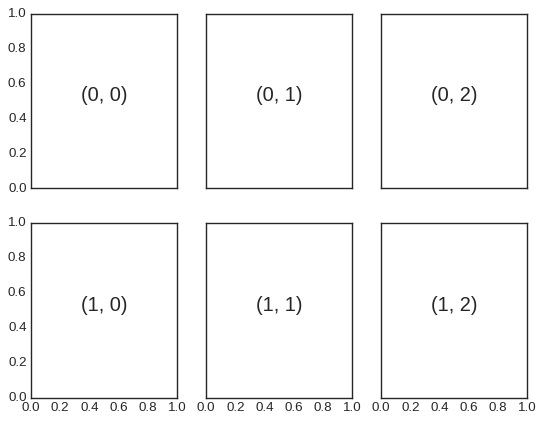

In [89]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

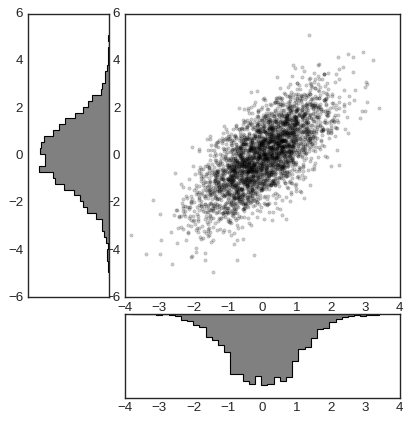

In [90]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

#### seaborn

In [93]:
import seaborn as sns
sns.set()

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

In [94]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

<ipython-input-95-25460d975215>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-95-25460d975215>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-95-25460d975215>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-95-25460d975215>:3: UserWarning: 

`distplot` is a deprecated function and will be re

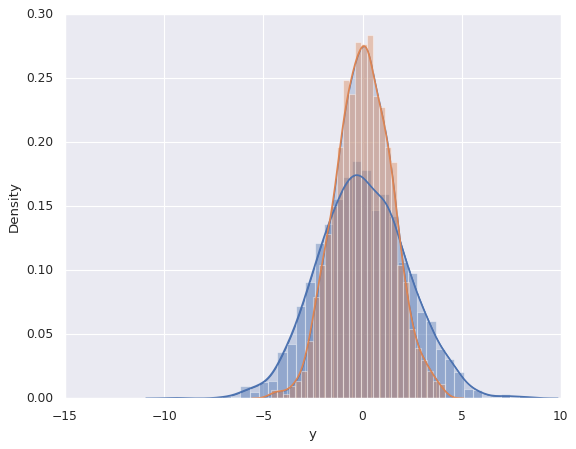

In [95]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    sns.distplot(data[col])

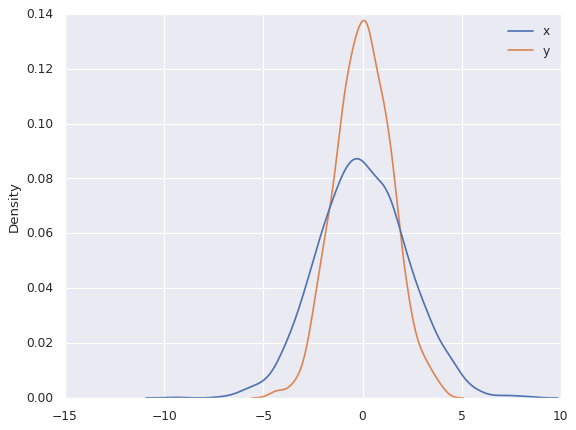

In [96]:
sns.kdeplot(data);

### References

* https://www.amazon.com/Data-Visualization-Python-JavaScript-Transform/dp/1491920513/
* http://adilmoujahid.com/posts/2016/08/interactive-data-visualization-geospatial-d3-dc-leaflet-python/
* https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
* https://gist.github.com/5agado/ee95008f25730d04bfd0eedd5c36f0ee#file-pandas-and-seaborn-ipynb
* http://kanoki.org/2017/07/09/get-started-with-matplotlib-data-visualization-for-python/
* https://www.dataquest.io/blog/python-data-visualization-libraries/

* https://www.accenture.com/t20150523T021054__w__/us-en/_acnmedia/Accenture/Conversion-Assets/DotCom/Documents/Global/PDF/Digital_2/Accenture-Accellerating-Understanding-Through-Data-Visualization.pdf
* https://medium.com/towards-data-science/in-defense-of-simplicity-a-data-visualization-journey-86676bd05c57
* https://www.youtube.com/watch?v=fZswD5RC1G8&index=9&list=PLa4VFIBUKrgLao-DalwedOCiq9RV6MPk9
* http://info.slis.indiana.edu/~katy/S637-S11/cleveland84.pdf
* https://tallys.github.io/color-theory/
* https://brainwashing.pro/dataviz-online
* http://flowingdata.com/2016/12/29/best-data-visualization-projects-of-2016/
* https://medium.com/@enjalot/the-hitchhikers-guide-to-d3-js-a8552174733a
* https://www.youtube.com/watch?v=n5NcCoa9dDU&list=UUNYL0ZF2j8-OSGZ4iHBLNPA
* https://www.youtube.com/watch?v=NnxRyaAA55A
* http://www.cs.sfu.ca/~torsten/Teaching/Cmpt467/LectureNotes/02_design.pdf
* http://www.easynotecards.com/notecard_set/10262
* https://github.com/rougier/scientific-visualization-book